### Coding Dense Class 

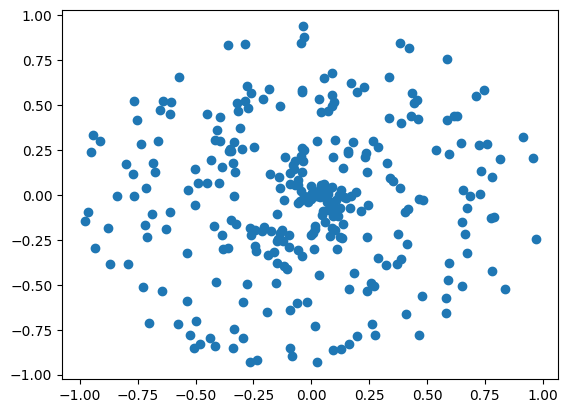

In [21]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs 
nnfs.init()
import matplotlib.pyplot as plt 
X,y = spiral_data(samples = 100, classes = 3)
plt.scatter(X[:,0],X[:,1])
plt.show()

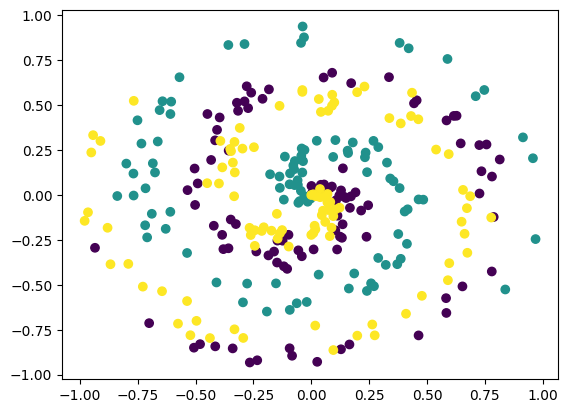

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

In [36]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

#Dense Layer 
class Layer_Dense:
    #Layer initialization 
    def __init__(self,n_inputs,n_neurons):
        self.weights = 0.01*np.random.rand(n_inputs,n_neurons) # initialise random value of gussain distribution of mean "0" and var "1"
        self.bias = np.zeros((1,n_neurons))
    #forward pass 
    def forwardpass(self,inputs):
        self.output = np.dot(inputs,self.weights) + self.bias
        
#create dataset
X,y = spiral_data(samples = 100,classes = 3)
#create Dense Layer with 2 input feature and 3 output values
dense1 = Layer_Dense(2,3)

#perform a forward pass of our training data through this layer 
dense1.forwardpass(X)

# Let's see output of the first few samples:
print(dense1.output[:5])

#the output with 3 column represent the output of the 3 neurons

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.97437393e-05 3.68895635e-05 8.37819971e-05]
 [1.46999708e-04 9.15808050e-05 1.40212578e-04]
 [2.07372344e-04 1.30936343e-04 5.65641167e-05]
 [2.86790368e-04 1.80765084e-04 1.03854705e-04]]


### Array summation in Python 

In [63]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

#this will give me sum of all the element in the array 
print(np.sum(A))

print(np.sum(A,axis = None)) # this is same as the above 

print(np.sum(A,axis = 0)) # this will give us the sum of columns , output will be in Array with 1 dimension 
print(np.sum(A,axis = 0).shape)
print(np.sum(A,axis = 1)) # this will give is the sum of rows , output will be in Array with 1 dimension
print(np.sum(A,axis = 1).shape)


45
45
[12 15 18]
(3,)
[ 6 15 24]
(3,)


In [60]:
#In both above row and column sum the vector we get is 1D vector means the dimension of the vector is only 3 not 3*1 or 1*3
# so if we want the dimension is in 2D then what we do is use "keepdims = true" parameter
print(np.sum(A,axis = 0 , keepdims = True)) # now this will give me array with 2 dimension 
print(np.sum(A,axis = 0 , keepdims = True).shape)

print(np.sum(A,axis = 1, keepdims = True)) # now this will give me array with 2 dimension
print(np.sum(A,axis = 1, keepdims = True).shape) 

[[12 15 18]]
(1, 3)
[[ 6]
 [15]
 [24]]
(3, 1)


In [62]:
A = [[1,2,3],[4,5,6],[7,8,9]]
np.max(A,axis=1)

array([3, 6, 9])

### Broadcasting  

In [65]:
a1 = np.arange(8).reshape(2,4)
a2 = np.arange(8,16).reshape(2,4)

print(a1)
print(a2)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [66]:
a1+a2

array([[ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [69]:
a3 + a4 # these two array has different dimension but they get add to each other because of broadcasting 

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10]])

#### Rules of Broadcasting

In [70]:
a1 = np.arange(8).reshape(2,4) # the dimension of this array is (x,y)==(2,4)
a2 = np.arange(8,16).reshape(2,4) # the dimension of this array is (m,n)==(2,4)

# if x=m and y=n then operation will take place 
a1+a2

array([[ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [71]:
a3 = np.arange(3).reshape(1,3)
a4 = np.arange(12).reshape(4,3)

# (x=1 and y=n) or(y=1 and x=m) then also operation will take place  
a3+a4

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13]])

In [73]:
a5 = np.arange(4).reshape(4,1)
a6 = np.arange(12).reshape(4,3)

print(a5)
print(a6)
a5+a6

[[0]
 [1]
 [2]
 [3]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14]])

In [74]:
a7 = np.arange(3).reshape(1,3)
a8 = np.arange(16).reshape(4,4)

#if (x=1 and y!=n) or (x!=m and y=1) then the operation will not take place 
a7+a8

ValueError: operands could not be broadcast together with shapes (1,3) (4,4) 

In [76]:
a9 = np.arange(3).reshape(1,3)
a10 = np.arange(3).reshape(3,1)

print(a9)
print(a10)

# if (x=1 and n=1 and y=m) or (y=1 and m=1 and x=n) then the operation will take place 
a9+a10

[[0 1 2]]
[[0]
 [1]
 [2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [78]:
a11 = np.arange(1).reshape(1,1)
a12 = np.arange(20).reshape(4,5)

# if x=1 and y=1 then the operation will take place 
a11+a12

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [83]:
#if they are of different dimensions

a13 = np.arange(4)  # this is of 1D
a14 = np.arange(20).reshape(5,4) # this is of 2D 

print(a13)
print(a14)


[0 1 2 3]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [85]:
a14+a13  # when we do addition then the a13 part will behave like (1*4) dimension then it will add 

array([[ 0,  2,  4,  6],
       [ 4,  6,  8, 10],
       [ 8, 10, 12, 14],
       [12, 14, 16, 18],
       [16, 18, 20, 22]])

In [86]:
A = np.arange(1,10).reshape(3,3)

In [87]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [94]:
A-np.max(A,axis=1,keepdims = True )

array([[-2, -1,  0],
       [-2, -1,  0],
       [-2, -1,  0]])